# Resultados

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path

In [2]:
fnr_x = []
fnr_m = []
pre_x = []
pre_m = []

for fn in Path('resultados/').glob('*.npy'):
    res = np.load(fn)
    m = res[0][0]
    x = res[1]

    if x.shape == (2, 2):
        fnr = x[1, 0] / (x[1, 0] + x[1, 1])
    elif x.shape == (3, 3):
        fp = x[0, 1] + x[0, 2]
        fn = x[1, 0] + x[2, 0]
        tp = x[1, 1] + x[1, 2] + x[2, 1] + x[2, 2]
        fnr = fn / (fn + tp)
        pre = tp / (tp + fp)
        pre_x.append(pre * 100)
        pre_m.append(m)
    else:
        continue

    fnr_x.append(fnr * 100)
    fnr_m.append(m)

## False Negative Rate (FNR):

$$ FNR = \frac{FN}{FN + TP} $$

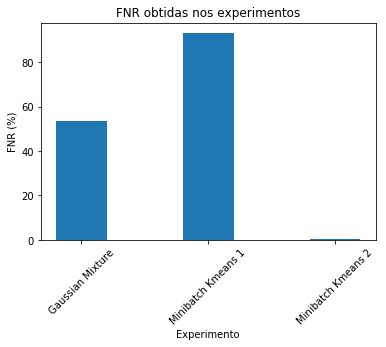

In [3]:
n = range(0, len(fnr_x))
plt.title('FNR obtidas nos experimentos')
plt.xlabel('Experimento')
plt.ylabel('FNR (%)')
plt.xticks(n, pre_m, rotation=45)
plt.bar(n, fnr_x, width=0.4)
plt.show()

## Precisão

$$
PRE = \frac{TP_1 + TP_2 + TP_3}{TP_1 + TP_2 + TP_3 + FP_1 + FP_2 + FP_3}
$$

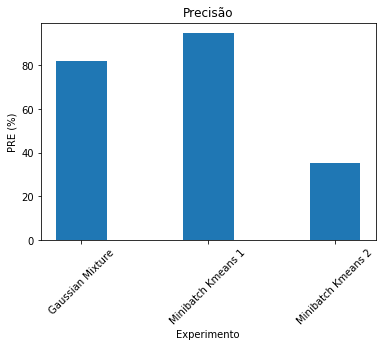

In [4]:
n = range(0, len(pre_x))
plt.title('Precisão')
plt.xlabel('Experimento')
plt.ylabel('PRE (%)')
plt.xticks(n, pre_m, rotation=45)
plt.bar(n, pre_x, width=0.4)
plt.show()